# Aproximación cuadrática
#### https://meet.noysi.com/metodosnumericos1

Vamos a aproximar la función $f=1/(1+x^2)$ en el intervalo $[-3,3]$ mediante polinomios de grado menor o igual a 4 en el espacio de las funciones continuas dotado de la norma inducida por el producto escalar
$$
\langle f,g\rangle = \int_{-3}^3 f(x)g(x)\,dx.
$$
En primer lugar, definimos una función que nos calcule el producto escalar.

In [1]:
# Producto escalar
def dot(p,q):
    return (p*q).integral(x,-3,3)
    # return numerical_integral(p*q,-3,3)[0]

Ahora aplicamos la ortogonalización de Gram-Schmidt para obtener una base ortogonal a partir de la base usual.

In [4]:
m = 4
base = [1+0*x]
base += [x - dot(x,base[0])/dot(base[0],base[0])]
print(base)
for _ in range(m-1):
    ai = dot(x*base[-1],base[-1])/dot(base[-1],base[-1])
    bi = dot(x*base[-1],base[-2])/dot(base[-2],base[-2])
    base += [((x-ai)*base[-1] - bi*base[-2]).expand()]
    print(base)
base

[1, x]
[1, x, x^2 - 3]
[1, x, x^2 - 3, x^3 - 27/5*x]
[1, x, x^2 - 3, x^3 - 27/5*x, x^4 - 54/7*x^2 + 243/35]


[1, x, x^2 - 3, x^3 - 27/5*x, x^4 - 54/7*x^2 + 243/35]

<div class="alert alert-block alert-info">
<strong>Ejercicio 1. </strong>
    
1. Calcular el polinomio de grado $\leq 4$ que mejor aproxima a $f$ en el espacio prehilbertiano anterior.
    
2. Calcular el polinomio de grado $\leq 10$ que mejor aproxima a $f$ en el espacio prehilbertiano anterior.
    
3. Calcular el polinomio de grado $\leq 4$ que mejor aproxima a $f$ en el espacio prehilbertiano anterior utilizando directamente la base usual. Para ello se planteará el sistema de ecuaciones dado por la condición de ortogonalidad de la mejor aproximación.

4. Repetir los ejercicios anteriores, pero con el producto escalar
$$
\langle f,g\rangle = \int_{-1}^1 \frac{f(x)g(x)}{\sqrt{1-x^2}}\,dx.
$$
</div>

$$ <f - \sum c_i g_i,g_j>=0 $$
$$ <f , g_j> - \sum c_i <g_i,g_j>=0 $$
$$ <f , g_j> - c_j < g_j,g_j>=0 $$
$$ c_j = \frac{\langle f , g_j\rangle}{\langle g_j,g_j \rangle} $$

In [5]:
base # g_j

[1, x, x^2 - 3, x^3 - 27/5*x, x^4 - 54/7*x^2 + 243/35]

In [14]:
f(x) = 1/(1+x^2)

In [16]:
cj = [ dot(f,gj)/dot(gj,gj) for gj in base]

In [18]:
p(x) = vector(cj) * vector(base)

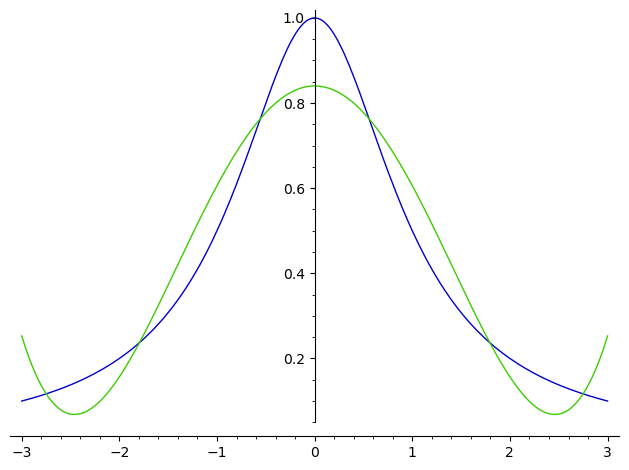

In [19]:
plot([f,p],-3,3)

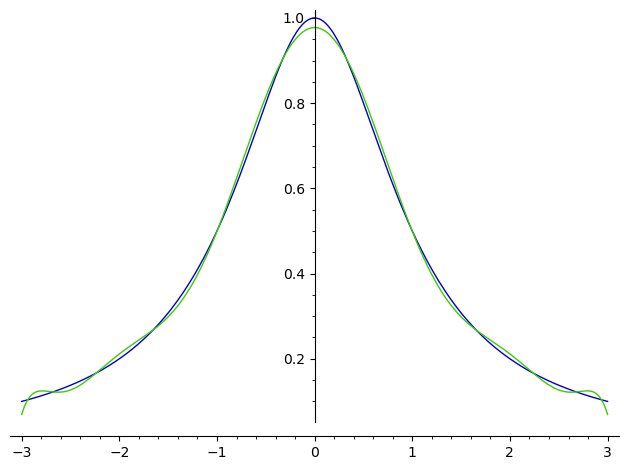

In [27]:
m = 10
base = [1+0*x]
base += [x - dot(x,base[0])/dot(base[0],base[0])]
for _ in range(m-1):
    ai = dot(x*base[-1],base[-1])/dot(base[-1],base[-1])
    bi = dot(x*base[-1],base[-2])/dot(base[-2],base[-2])
    base += [((x-ai)*base[-1] - bi*base[-2]).expand()]
cj = [ dot(f,gj)/dot(gj,gj) for gj in base]
p(x) = vector(cj) * vector(base)
plot([f,p],-3,3)

In [29]:
base = [1+0*x] + [x^k for k in [1..4]]
base

[1, x, x^2, x^3, x^4]

$$ g = \sum c_i g_i $$
$$ <f-g,g_j> = 0 $$
$$ <f,g_j> - \sum c_i < g_i, g_j> = 0 $$
$$  \sum < g_i, g_j> c_i  = <f,g_j> $$

In [32]:
A = matrix([ [ dot(gi,gj) for gi in base ] for gj in base])
show(A)

[     6      0     18      0  486/5]
[     0     18      0  486/5      0]
[    18      0  486/5      0 4374/7]
[     0  486/5      0 4374/7      0]
[ 486/5      0 4374/7      0   4374]

In [34]:
b = vector([dot(gi,f) for gi in base])
b

(2*arctan(3), 0, -2*arctan(3) + 6, 0, 2*arctan(3) + 12)

In [35]:
ci = A\b
ci

(265/144*arctan(3) - 35/24, 0, -805/648*arctan(3) + 35/27, 0, 4795/34992*arctan(3) - 875/5832)

In [36]:
p(x) = ci * vector(base)

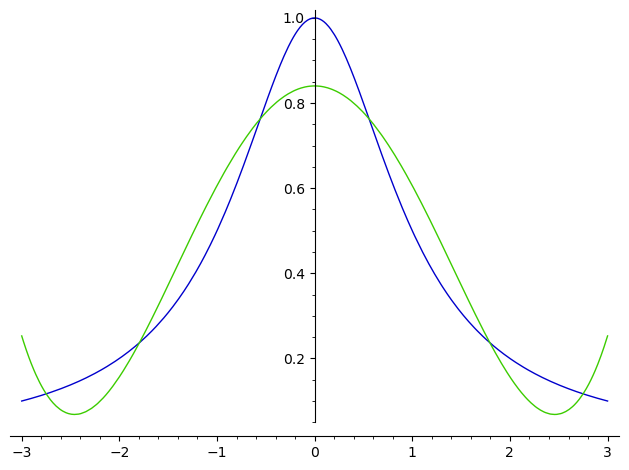

In [37]:
plot([f,p],-3,3)

<div class="alert alert-block alert-info">
<strong>Ejercicio 2. </strong>
    
Considerar ahora el producto (semi)escalar dado por 
$$
\langle f,g\rangle = \sum_{i=0}^4 f(x_i)g(x_i),
$$
donde $x_i$ son puntos equiespaciados con $x_0=-3$ y $x_4=3$. 
    
    
1. Calcular la mejor aproximación de $f$ mediante polinomios de grado menor o igual a 2 en el espacio de funciones continuas dotado con la norma anterior. 
    
2. Calcular la mejor aproximación de $f$ mediante polinomios de grado menor o igual a 4 en el espacio de funciones continuas dotado con la norma anterior. Comparar el polinomio obtenido con el polinomio interpolador en 5 puntos equiespaciados. 
</div>

<div class="alert alert-block alert-info">
<strong>Ejercicio 3. </strong>
    
Considerar el producto escalar dado por 
$$
\langle f,g\rangle = \int_{-\pi}^\pi f(x_i)g(x_i),
$$

1. Encontrar una base ortogonal del subespacio generado por $1,\sin x,\cos x, \cos^2 x, \cos x \sin x, \sin^2 x$. 

2. Comprobar que $1,\sin x, \cos x,\sin(2x),\cos(2x)$ forman una base ortogonal.

3. Obtener la mejor aproximación de $f(x)=x$. Dibujar la mejor aproximación entre $-4\pi$ y $4\pi$.
    
</div>

In [32]:
# Defino el producto escalar
def dot(f,g):
    return (f*g).integral(x,-pi,pi)

In [33]:
# Voy a ir creando la base por ortogonalización
base = [1+0*x,sin(x),cos(x),cos(x)^2,cos(x)*sin(x)] # Elimino el último elemento, porque no es linealmente ind.

In [34]:
# Lo podría hacer directamente, pero he preferido plantearlo como ecuaciones para que sea más sencillo de entender
var('a0')
bo = [base[0]] # El primer elemento de la base ortogonal será el primer elemento de la base normal
solve(dot(bo[0] , a0*bo[0] + base[1])==0,a0) # Calculo el parámetro para que el elemento generado sea ortogonal

[a0 == 0]

In [35]:
# Sustituyendo a0 por 0 en a*bo[0] + base[1] tenemos el segundo elemento
bo += [base[1]]
bo

[1, sin(x)]

In [36]:
# Consideramos un nuevo elemento genérico e imponemos que sea ortogonal a los dos anteriores
var('a1') 
solve([dot(bo[0] , a0*bo[0] + a1*bo[1] + base[2])==0,
       dot(bo[1] , a0*bo[0] + a1*bo[1] + base[2])==0],a0,a1) 

[[a0 == 0, a1 == 0]]

In [37]:
# Sustituyendo tenemos el tercer elemento
bo += [base[2]]
bo

[1, sin(x), cos(x)]

In [38]:
# Consideramos un nuevo elemento genérico e imponemos que sea ortogonal a los tres anteriores
var('a2') 
solve([dot(bo[0] , a0*bo[0] + a1*bo[1] + a2*bo[2] + base[3])==0,
       dot(bo[1] , a0*bo[0] + a1*bo[1] + a2*bo[2] + base[3])==0,
       dot(bo[2] , a0*bo[0] + a1*bo[1] + a2*bo[2] + base[3])==0],a0,a1,a2) 

[[a0 == (-1/2), a1 == 0, a2 == 0]]

In [39]:
# Sustituyendo tenemos el cuarto elemento
bo += [-bo[0]/2 + base[3]]
bo

[1, sin(x), cos(x), cos(x)^2 - 1/2]

In [40]:
# Consideramos un nuevo elemento genérico e imponemos que sea ortogonal a los cuatro anteriores
var('a3') 
solve([dot(bo[0] , a0*bo[0] + a1*bo[1] + a2*bo[2] + a3*bo[3] + base[4])==0,
       dot(bo[1] , a0*bo[0] + a1*bo[1] + a2*bo[2] + a3*bo[3] + base[4])==0,
       dot(bo[2] , a0*bo[0] + a1*bo[1] + a2*bo[2] + a3*bo[3] + base[4])==0,
       dot(bo[3] , a0*bo[0] + a1*bo[1] + a2*bo[2] + a3*bo[3] + base[4])==0,],a0,a1,a2,a3) 

[[a0 == 0, a1 == 0, a2 == 0, a3 == 0]]

In [41]:
# Sustituyendo tenemos el quinto elemento
bo += [ base[4]]
bo

[1, sin(x), cos(x), cos(x)^2 - 1/2, cos(x)*sin(x)]

In [42]:
# comprobamos
show(matrix([[dot(f,g) for f in bo] for g in bo]))

[  2*pi      0      0      0      0]
[     0     pi      0      0      0]
[     0      0     pi      0      0]
[     0      0      0 1/4*pi      0]
[     0      0      0      0 1/4*pi]